In [35]:
import boto3
import pandas as pd
import pyarrow.parquet as pq
from io import BytesIO

AWS_ACCESS_KEY_ID = ''
AWS_SECRET_ACCESS_KEY = ''
AWS_REGION = 'us-west-1'


s3 = boto3.client('s3', aws_access_key_id=AWS_ACCESS_KEY_ID,
                  aws_secret_access_key=AWS_SECRET_ACCESS_KEY,
                  region_name=AWS_REGION)


bucket_name = 'tradeoutput'
file_key_1 = 'trade_data.csv'
file_key_2 = 'market_data.csv'

# Retrieve file objects from S3
file_object_1 = s3.get_object(Bucket=bucket_name, Key=file_key_1)
file_object_2 = s3.get_object(Bucket=bucket_name, Key=file_key_2)

# Load file contents into Pandas DataFrames
trade_data = pd.read_csv(file_object_1['Body'])
market_data = pd.read_csv(file_object_2['Body'])

In [36]:
merged_trade_data = pd.merge(price_data, market_Data, on='CUSIP', how='inner')

In [37]:
#
trade_data.head(5)



,CUSIP,Trade Date,Trade Time,Trade Size,Face Value,Asset Inventory,Fill,Execution Time,Trade Price,Trade Direction,Counterparty,Trader
0,912810SZ41,2024-01-02,09:44,855670,100,99144330,1.0,3.0,941.857263,BUY,Benjie,Benjie Trader 2
1,912810SZ41,2024-01-02,15:01,918147,100,99081853,1.0,4.0,941.980007,SELL,Benjie,Benjie Trader 2
2,912810SZ41,2024-01-02,15:43,912905,100,99087095,1.0,3.0,941.287712,SELL,Benjie,Benjie Trader 2
3,912810SZ41,2024-01-02,09:57,829868,100,99170132,NaN,NaN,941.179803,BUY,Benjie,Benjie Trader 2
4,912810SZ41,2024-01-02,13:53,908501,100,99091499,1.0,4.0,941.634826,BUY,Benjie,Benjie Trader 2


In [38]:
market_data.head(5)

,CUSIP,Date,Time,Price
0,912810SZ41,2024-01-02,09:30,0.000000
1,912810SZ41,2024-01-02,09:31,945.895541
2,912810SZ41,2024-01-02,09:32,941.814604
3,912810SZ41,2024-01-02,09:33,941.403917
4,912810SZ41,2024-01-02,09:34,941.570813


In [39]:
merged_trade_data.head(5)

,CUSIP,Trade Date,Trade Time,Trade Size,Face Value,Asset Inventory,Fill,Execution Time,Trade Price,Trade Direction,Counterparty,Trader,Date,Time,Price
0,912810SZ41,2024-01-02,09:44,855670,100,99144330,1.0,3.0,941.857263,BUY,Benjie,Benjie Trader 2,2024-01-02,09:30,0.000000
1,912810SZ41,2024-01-02,09:44,855670,100,99144330,1.0,3.0,941.857263,BUY,Benjie,Benjie Trader 2,2024-01-02,09:31,945.895541
2,912810SZ41,2024-01-02,09:44,855670,100,99144330,1.0,3.0,941.857263,BUY,Benjie,Benjie Trader 2,2024-01-02,09:32,941.814604
3,912810SZ41,2024-01-02,09:44,855670,100,99144330,1.0,3.0,941.857263,BUY,Benjie,Benjie Trader 2,2024-01-02,09:33,941.403917
4,912810SZ41,2024-01-02,09:44,855670,100,99144330,1.0,3.0,941.857263,BUY,Benjie,Benjie Trader 2,2024-01-02,09:34,941.570813


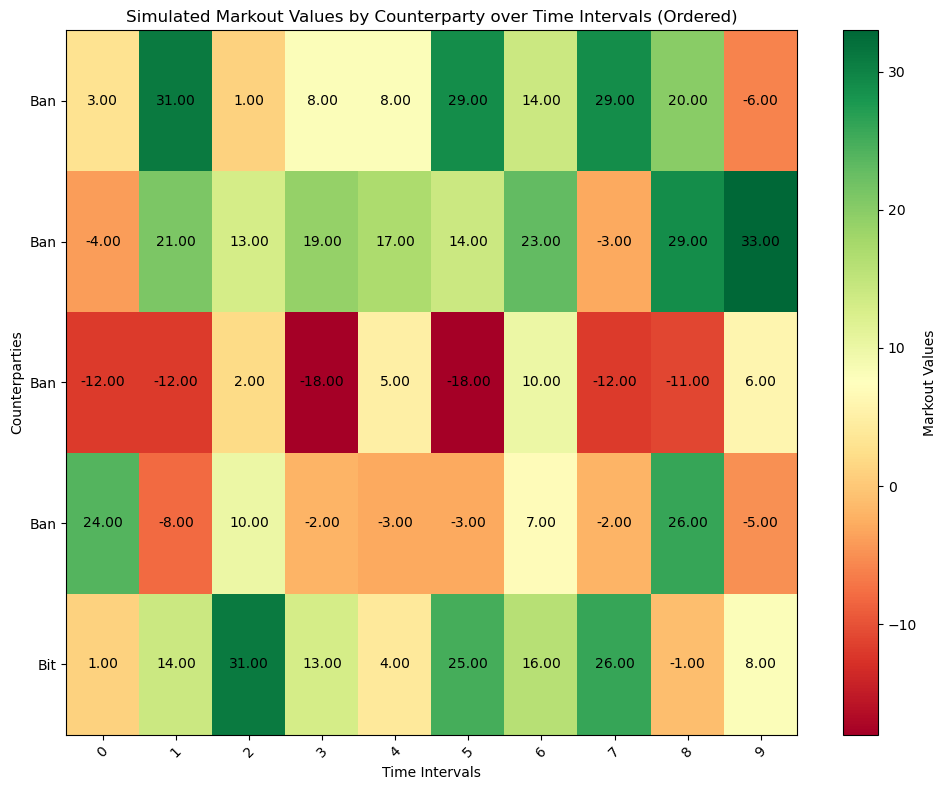

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Simulating the data based on the provided markout formulas
num_traders = 5
num_intervals = 10

# For this example, let's assume trade data with random values
trade_markout_data = {
    'Counterparty': np.random.choice(['Benjie', 'Ban', 'Bit'], size=num_traders),
    'Trade Price': np.random.randint(80, 120, num_traders),
    'Trade Date': np.random.choice(pd.date_range('2023-01-01', periods=10, freq='D'), num_traders),
    'Trade Direction': np.random.choice(['BUY', 'SELL'], size=num_traders)
}

# Generating simulated markout values based on the provided formulas
markout_data = np.zeros((num_traders, num_intervals))

for i in range(num_traders):
    for j in range(num_intervals):
        if trade_markout_data['Trade Direction'][i] == 'BUY':
            # Simulating BUY Markout(t) = trade_price - reference_price
            trade_price = trade_markout_data['Trade Price'][i]
            reference_price = np.random.randint(80, 120)  # Simulating reference price
            markout_data[i][j] = trade_price - reference_price
        else:
            # Simulating SELL Markout(t) = reference_price - trade_price
            trade_price = trade_markout_data['Trade Price'][i]
            reference_price = np.random.randint(80, 120)  
            markout_data[i][j] = reference_price - trade_price

# Sorting by Counterparty
sorted_indices = np.argsort(trade_markout_data['Counterparty'])
trade_markout_data['Counterparty'] = np.array(trade_markout_data['Counterparty'])[sorted_indices]
markout_data = markout_data[sorted_indices]

# Plotting the heatmap based on simulated markout data
plt.figure(figsize=(10, 8))
plt.imshow(markout_data, cmap='RdYlGn', aspect='auto')

# Displaying the markout values in the boxes
for i in range(num_traders):
    for j in range(num_intervals):
        plt.text(j, i, f'{markout_data[i][j]:.2f}', ha='center', va='center', color='black')

plt.colorbar(label='Markout Values')
plt.title('Simulated Markout Values by Counterparty over Time Intervals (Ordered)')
plt.xlabel('Time Intervals')
plt.ylabel('Counterparties')
plt.xticks(np.arange(num_intervals), np.arange(num_intervals), rotation=45)
plt.yticks(np.arange(num_traders), trade_markout_data['Counterparty'])
plt.tight_layout()
plt.show()


# Visualization-pie chart-2

In [43]:
import numpy as np
import pandas as pd
import plotly.express as px

num_trades = 50
np.random.seed(0)

trade_data_pie = {
    'Fill Status': np.random.choice([np.nan, '10 mins'], size=num_trades),
    'Trade Sizes': np.random.randint(1, 100, size=num_trades),
    'Face Values': np.random.randint(100, 1000, size=num_trades),
    'Counterparty': np.random.choice(['Benjie', 'Ban', 'Bit'], size=num_trades),
    'Trader': np.random.choice(['Trader1', 'Trader2', 'Trader3'], size=num_trades),
    'Trade Date': pd.date_range('2023-01-01', periods=num_trades),
}

# Create a DataFrame
df_pie = pd.DataFrame(trade_data_pie)

# Filter only 'completed' and 'cancelled' orders
filtered_data_pie = df_pie[df_pie['Fill Status'].notnull()]

# Group trades by Counterparty and calculate total $FV for completed and non-completed trades
grouped_pie = filtered_data_pie.groupby('Counterparty').apply(
    lambda x: pd.Series({
        'Completed FV': (x[x['Fill Status'].notnull()]['Trade Sizes'] * x[x['Fill Status'].notnull()]['Face Values']).sum(),
        'Missed FV': (x[x['Fill Status'].isnull()]['Trade Sizes'] * x[x['Fill Status'].isnull()]['Face Values']).sum()
    })
)

# Calculate percentages for completed and missed trades
grouped_pie['Completed %'] = grouped_pie['Completed FV'] / grouped_pie['Completed FV'].sum() * 100
grouped_pie['Missed %'] = grouped_pie['Missed FV'] / grouped_pie['Missed FV'].sum() * 100

# Convert 'Trade Date' to datetime format
df_pie['Trade Date'] = pd.to_datetime(df_pie['Trade Date'])

# Create an interactive pie chart using Plotly
fig_pie = px.pie(grouped_pie, values='Completed %', names=grouped_pie.index, title='Percentage of Completed Trades by Counterparty')

# Define a custom hover template for the pie chart
hover_template_pie = '<b>%{label}</b><br>' \
                     'Completed FV: %{value:.2f}%<br>' \
                     'Trade Date: %{fullData.name|%Y-%m-%d}<br>' \
                     'Trader: %{fullData.name|%Y-%m-%d|%H:%M:%S}'

fig_pie.update_traces(hoverinfo='label+percent+name', hovertemplate=hover_template_pie)

# Add a slider for changing the time horizon
fig_pie.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            x=1.05,
            y=0.7,
            buttons=[
                dict(label="Last Month", method="relayout", args=[{"xaxis.range[0]": pd.to_datetime('today') - pd.DateOffset(months=1), "xaxis.range[1]": pd.to_datetime('today')}]),
                dict(label="Last Week", method="relayout", args=[{"xaxis.range[0]": pd.to_datetime('today') - pd.DateOffset(weeks=1), "xaxis.range[1]": pd.to_datetime('today')}]),
                dict(label="Last Day", method="relayout", args=[{"xaxis.range[0]": pd.to_datetime('today') - pd.DateOffset(days=1), "xaxis.range[1]": pd.to_datetime('today')}]),
            ],
        )
    ]
)

fig_pie.show()


In [41]:
import numpy as np
import pandas as pd
import plotly.express as px

num_trades = 50
np.random.seed(0)

trade_data_pie = {
    'Fill Status': np.random.choice([np.nan, '10 mins'], size=num_trades),
    'Trade Sizes': np.random.randint(1, 100, size=num_trades),
    'Face Values': np.random.randint(100, 1000, size=num_trades),
    'Counterparty': np.random.choice(['Benjie', 'Ban', 'Bit'], size=num_trades)
}

# Filter only 'completed' and 'cancelled' orders
filtered_data = pd.DataFrame(trade_data_pie)
filtered_data = filtered_data[filtered_data['Fill Status'].notnull()]

# Group trades by Counterparty and calculate total $FV for completed and non-completed trades
grouped = filtered_data.groupby('Counterparty').apply(
    lambda x: pd.Series({
        'Completed FV': (x['Trade Sizes'] * x['Face Values']).sum()
    })
)

# Calculate percentages for completed trades
grouped['Completed %'] = grouped['Completed FV'] / grouped['Completed FV'].sum() * 100

# Create an interactive pie chart using Plotly
fig = px.pie(grouped, values='Completed %', names=grouped.index, title='Percentage of Completed and Cancelled Trades by Counterparty')
fig.update_traces(textposition='inside', textinfo='percent+label')

fig.show()


In [44]:
import numpy as np
import pandas as pd
import plotly.express as px

num_trades = 50
np.random.seed(0)

trade_data_pie = {
    'Fill Status': np.random.choice(['Completed', 'Cancelled'], size=num_trades, p=[0.7, 0.3]),
    'Trade Sizes': np.random.randint(1, 100, size=num_trades),
    'Face Values': np.random.randint(100, 1000, size=num_trades),
    'Counterparty': np.random.choice(['Benjie', 'Ban', 'Bit'], size=num_trades),
    'Trader': np.random.choice(['Trader1', 'Trader2', 'Trader3'], size=num_trades),
}

# Filter only 'completed' and 'cancelled' orders
filtered_data = pd.DataFrame(trade_data_pie)
filtered_data = filtered_data[filtered_data['Fill Status'].notnull()]

# Calculate total $FV for completed and cancelled trades
total_completed_fv = (filtered_data[filtered_data['Fill Status'] == 'Completed']['Trade Sizes'] * 
                      filtered_data[filtered_data['Fill Status'] == 'Completed']['Face Values']).sum()

total_cancelled_fv = (filtered_data[filtered_data['Fill Status'] == 'Cancelled']['Trade Sizes'] * 
                      filtered_data[filtered_data['Fill Status'] == 'Cancelled']['Face Values']).sum()

# Calculate percentages for completed and cancelled trades
completed_percentage = total_completed_fv / (total_completed_fv + total_cancelled_fv) * 100
cancelled_percentage = total_cancelled_fv / (total_completed_fv + total_cancelled_fv) * 100

# Create a hierarchical DataFrame for sunburst chart
sunburst_data = filtered_data.groupby(['Fill Status', 'Counterparty', 'Trader']).agg(
    FilledFV=('Trade Sizes', 'sum'),
).reset_index()

# Create an interactive sunburst chart using Plotly
fig = px.sunburst(
    sunburst_data,
    path=['Fill Status', 'Counterparty', 'Trader'],
    values='FilledFV',
    title='Trade Status Breakdown',
    hover_data=['FilledFV'],
)

hover_template_pie = '<b>%{label}</b><br>' \
                     'Completed FV: %{value:.2f}%<br>' \
                     'Trade Date: %{fullData.name|%Y-%m-%d}<br>' \
                     'Trader: %{fullData.name|%Y-%m-%d|%H:%M:%S}'

fig_pie.update_traces(hoverinfo='label+percent+name', hovertemplate=hover_template_pie)

# Add a slider for changing the time horizon
fig_pie.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            x=1.05,
            y=0.7,
            buttons=[
                dict(label="Last Month", method="relayout", args=[{"xaxis.range[0]": pd.to_datetime('today') - pd.DateOffset(months=1), "xaxis.range[1]": pd.to_datetime('today')}]),
                dict(label="Last Week", method="relayout", args=[{"xaxis.range[0]": pd.to_datetime('today') - pd.DateOffset(weeks=1), "xaxis.range[1]": pd.to_datetime('today')}]),
                dict(label="Last Day", method="relayout", args=[{"xaxis.range[0]": pd.to_datetime('today') - pd.DateOffset(days=1), "xaxis.range[1]": pd.to_datetime('today')}]),
            ],
        )
    ]
)

fig.show()


In [30]:
import pandas as pd
import plotly.express as px

# Replace this with your actual trade dataset
# Example:
# trade_data = pd.read_csv('your_trade_data.csv')
trade_data = {
    'Fill Status': ['nan', '10 mins', 'nan', '10 mins', 'nan'],
    'Trade Sizes': [10, 20, 15, 30, 25],
    'Face Values': [100, 150, 120, 200, 180],
    'Counterparty': ['A', 'B', 'A', 'B', 'C']
}

# Create a DataFrame
df = pd.DataFrame(trade_data)

# Calculate FV for non-completed and completed trades
non_completed = df[df['Fill Status'] == 'nan']
completed = df[df['Fill Status'] != 'nan']

total_non_completed = (non_completed['Trade Sizes'] * non_completed['Face Values']).sum()
total_completed = (completed['Trade Sizes'] * completed['Face Values']).sum()

# Calculate percentages
percentage_missed = total_non_completed / (total_non_completed + total_completed) * 100
percentage_completed = total_completed / (total_non_completed + total_completed) * 100

# Plotting the pie chart
fig = px.pie(names=['Completed', 'Missed'],
             values=[percentage_completed, percentage_missed],
             title='Percentage of Completed and Missed Trades')
fig.show()

In [45]:
import pandas as pd
import plotly.express as px

# Your actual trade dataset
trade_data = {
    'CUSIP': ['912810SZ41', '912810SZ41', '912810SZ41', '912810SZ41', '912810SZ41'],
    'Trade Date': ['2024-01-02', '2024-01-02', '2024-01-02', '2024-01-02', '2024-01-02'],
    'Trade Time': ['09:44', '15:01', '15:43', '09:57', '13:53'],
    'Trade Size': [855670, 918147, 912905, 829868, 908501],
    'Face Value': [100, 100, 100, 100, 100],
    'Asset Inventory': [99144330, 99081853, 99087095, 99170132, 99091499],
    'Fill': [1.0, 1.0, 1.0, None, 1.0],
    'Execution Time': [3.0, 4.0, 3.0, None, 4.0],
    'Trade Price': [941.8572628281740, 941.9800071476000, 941.2877122608780, 941.1798031008240, 941.6348263300350],
    'Trade Direction': ['BUY', 'SELL', 'SELL', 'BUY', 'BUY'],
    'Counterparty': ['Benjie', 'Benjie', 'Benjie', 'Benjie', 'Benjie'],
    'Trader': ['Benjie Trader 2', 'Benjie Trader 2', 'Benjie Trader 2', 'Benjie Trader 2', 'Benjie Trader 2']
}

# Create a DataFrame from the trade data
df = pd.DataFrame(trade_data)

# Calculate Face Value for completed and non-completed trades
non_completed = df[df['Fill'].isnull()]
completed = df[df['Fill'].notnull()]

total_non_completed = (non_completed['Trade Size'] * non_completed['Face Value']).sum()
total_completed = (completed['Trade Size'] * completed['Face Value']).sum()

# Calculate percentages
percentage_missed = total_non_completed / (total_non_completed + total_completed) * 100
percentage_completed = total_completed / (total_non_completed + total_completed) * 100

# Plotting the pie chart
fig = px.pie(names=['Completed', 'Missed'],
             values=[percentage_completed, percentage_missed],
             title='Percentage of Completed and Missed Trades')
hover_template_pie = '<b>%{label}</b><br>' \
                     'Completed FV: %{value:.2f}%<br>' \
                     'Trade Date: %{fullData.name|%Y-%m-%d}<br>' \
                     'Trader: %{fullData.name|%Y-%m-%d|%H:%M:%S}'

fig_pie.update_traces(hoverinfo='label+percent+name', hovertemplate=hover_template_pie)

# Add a slider for changing the time horizon
fig_pie.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            x=1.05,
            y=0.7,
            buttons=[
                dict(label="Last Month", method="relayout", args=[{"xaxis.range[0]": pd.to_datetime('today') - pd.DateOffset(months=1), "xaxis.range[1]": pd.to_datetime('today')}]),
                dict(label="Last Week", method="relayout", args=[{"xaxis.range[0]": pd.to_datetime('today') - pd.DateOffset(weeks=1), "xaxis.range[1]": pd.to_datetime('today')}]),
                dict(label="Last Day", method="relayout", args=[{"xaxis.range[0]": pd.to_datetime('today') - pd.DateOffset(days=1), "xaxis.range[1]": pd.to_datetime('today')}]),
            ],
        )
    ]
)
fig.show()


# Visualization3:

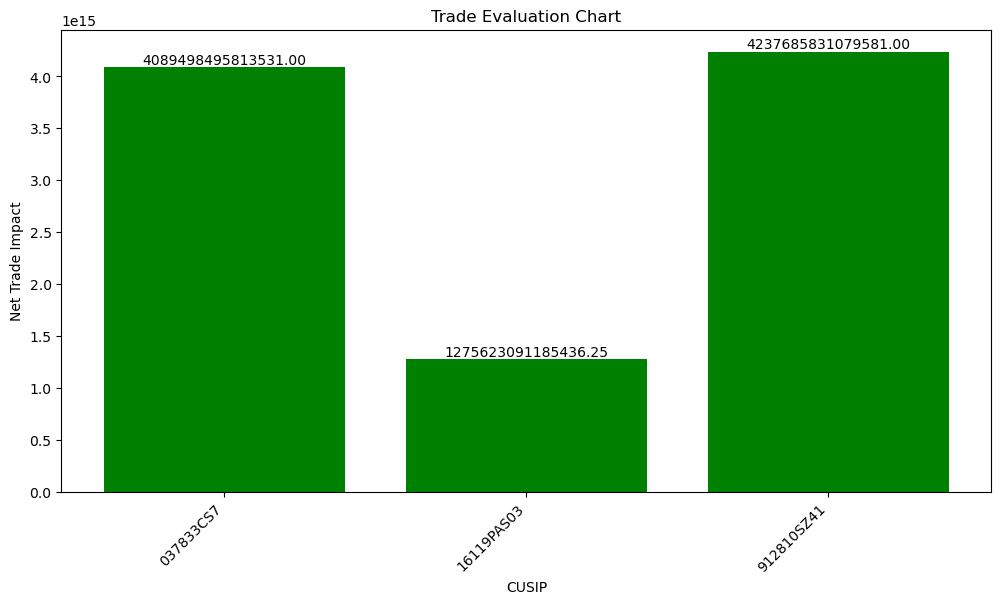

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the merged dataframe: merged_trade_data

# Calculate 'Trade_Price_Min' as the reference price at the same minute as the trade
merged_trade_data['Trade_Price_Min'] = merged_trade_data.groupby(['CUSIP', 'Trade Date', 'Trade Time'])['Price'].transform('min')

# Calculate metrics
merged_trade_data['Expected TCA'] = merged_trade_data['Trade Size'] * (merged_trade_data['Trade Price'] - merged_trade_data['Trade_Price_Min'])
merged_trade_data['Trade Impact'] = merged_trade_data['Trade Size'] * (merged_trade_data['Trade Price'] - merged_trade_data['Price'])
merged_trade_data['Net Trade Impact'] = merged_trade_data['Expected TCA'] + merged_trade_data['Trade Impact']

# Group by CUSIP and sum up the Net Trade Impact for each CUSIP
net_trade_impact_by_cusip = merged_trade_data.groupby('CUSIP')['Net Trade Impact'].sum()

# Plotting the Trade Evaluation Chart with custom colors
plt.figure(figsize=(12, 6))
colors = ['green' if value >= 0 else 'red' for value in net_trade_impact_by_cusip]
plt.bar(net_trade_impact_by_cusip.index, net_trade_impact_by_cusip, color=colors)

# Adding labels to the bars
for cusip, value in zip(net_trade_impact_by_cusip.index, net_trade_impact_by_cusip):
    plt.text(cusip, value, f'{value:.2f}', ha='center', va='bottom' if value >= 0 else 'top', color='black')

plt.title('Trade Evaluation Chart')
plt.xlabel('CUSIP')
plt.ylabel('Net Trade Impact')
plt.xticks(rotation=45, ha='right')
plt.show()


# Visualization 5

In [84]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Assuming 'trade_data' is your DataFrame with required fields

# # Calculate PnL for each trade
# trade_data['PnL'] = (trade_data['Trade Price'] - trade_data['Reference Price'])

# # Group by Counterparty/Trader and calculate cumulative PnL over time
# grouped = trade_data.groupby(['Counterparty', 'Trade Date'])['PnL'].sum().reset_index()

# # Plotting PnL over time for each Counterparty/Trader
# plt.figure(figsize=(10, 6))
# for name, group in grouped.groupby('Counterparty'):
#     plt.plot(group['Trade Date'], group['PnL'], label=name)

# plt.xlabel('Trade Date')
# plt.ylabel('Cumulative PnL')
# plt.title('PnL by Counterparty/Trader over Time')
# plt.legend()
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()
import pandas as pd
import numpy as np

trade_data['Trade Date'] = pd.to_datetime(trade_data['Trade Date'] + ' ' + trade_data['Trade Time'])

# Set 'Trade Date' as the index if it's not already
trade_data.set_index('Trade Date', inplace=True)

# Filter trade data for the past hour
past_hour_data = trade_data.loc[pd.Timestamp.now() - pd.Timedelta(hours=1):]

# Calculate reference prices at 5-minute intervals
reference_prices = past_hour_data.resample('5T')['Trade Price'].mean().ffill()

print(reference_prices)

KeyError: 'Trade Date'

In [86]:
print(trade_data)


                     Trade Price
2024-01-01 12:00:00          101
2024-01-01 12:01:00          142
2024-01-01 12:02:00           64
2024-01-01 12:03:00          121
2024-01-01 12:04:00          110
...                          ...
2024-01-01 13:35:00          134
2024-01-01 13:36:00          129
2024-01-01 13:37:00          131
2024-01-01 13:38:00          102
2024-01-01 13:39:00           73

[100 rows x 1 columns]
